# Homework 2

6. Suppose we collect data for a group of students in a statistics class
with variables X1 =hours studied, X2 =undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, ˆ β0 = −6, ˆβ1 = 0.05, ˆβ2 = 1.

(a) Estimate the probability that a student who studies for 40 h and
has an undergrad GPA of 3.5 gets an A in the class.

(b) How many hours would the student in part (a) need to study to
have a 50% chance of getting an A in the class?

In [7]:
#a) 
exp(-6+0.05*40+1*3.5)/(1+exp(-6+0.05*40+1*3.5)) #37.75%

[1] 0.3775407

b) 

exp(-6+0.05*X1+1*3.5)/(1+exp(-6+0.05*X1+1*3.5)) = 0.5

solving for X1,

X1=50 hours

8. Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20% on the
training data and 30% on the test data. Next we use 1-nearest neighbors
(i.e. K = 1) and get an average error rate (averaged over both
test and training data sets) of 18%. Based on these results, which
method should we prefer to use for classification of new observations?
Why?

9. This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

(b) Suppose that an individual has a 16% chance of defaulting on
her credit card payment. What are the odds that she will default?

a)

0.37=p(x)/(1-p(x))

then solve for p(x)

p(x)= 0.27

b)

odds=0.16/(1-0.16)

then solve for odds

odds=0.19

10. This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Which of these methods appears to provide the best results on
this data?

(i) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [13]:
library(ISLR)

In [27]:
#a)
summary(Weekly)
cor(Weekly[,(1:(ncol(Weekly)-1))])  #no need for direction

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


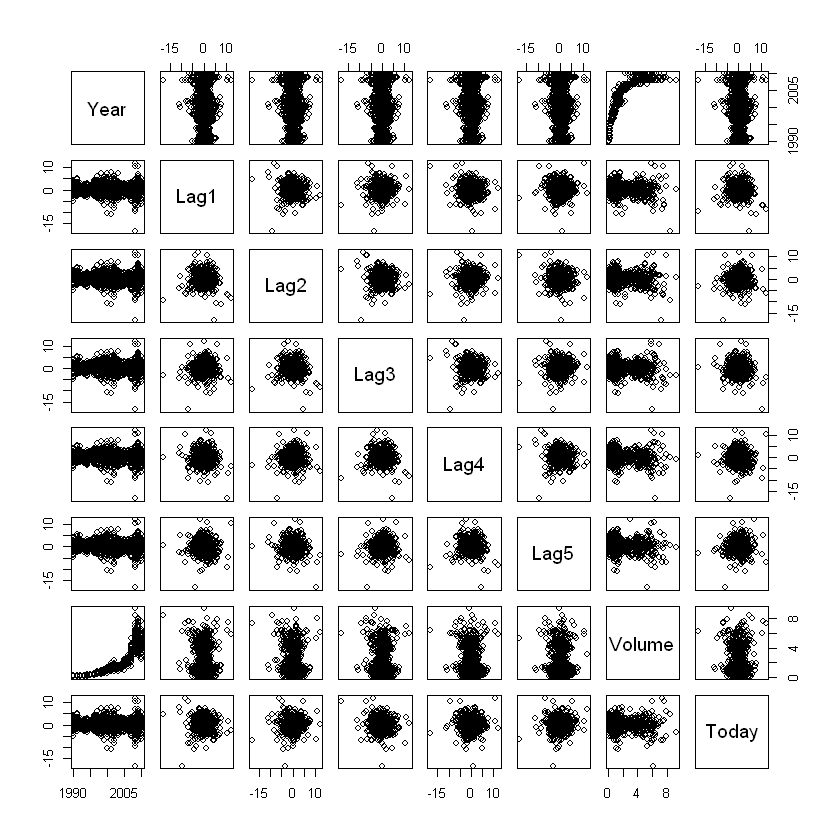

In [28]:
pairs(Weekly[,(1:(ncol(Weekly)-1))]) #year and volume 

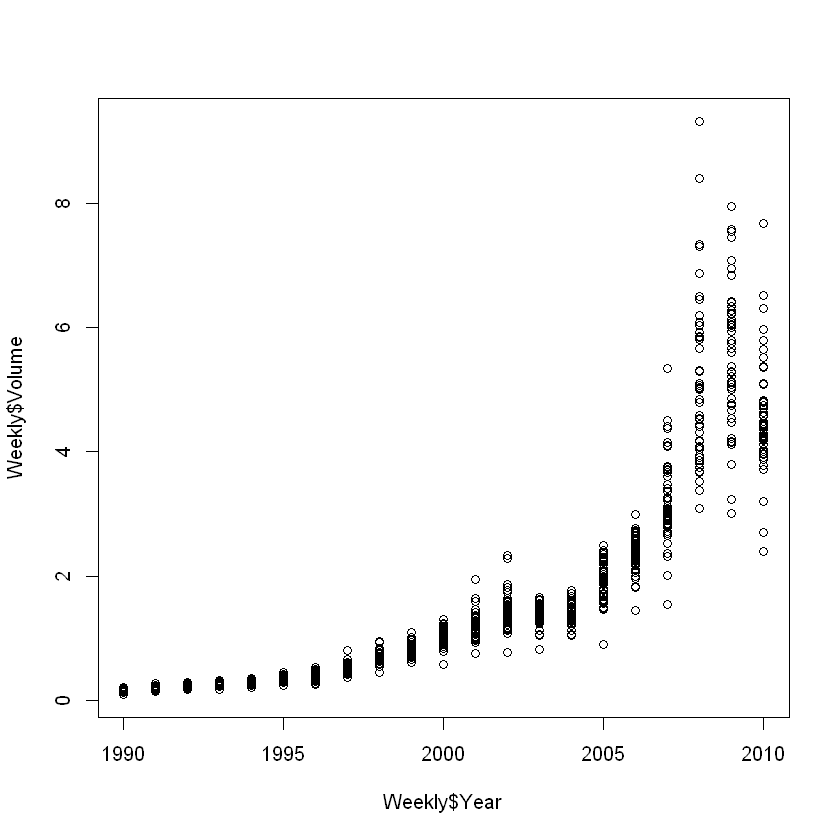

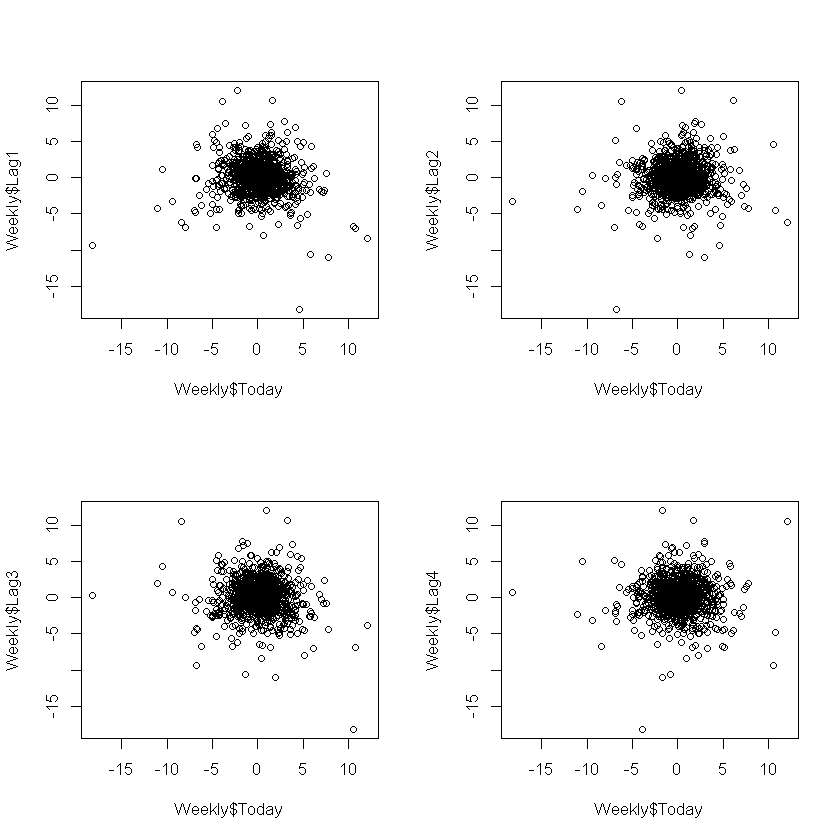

In [30]:
plot(Weekly$Year,Weekly$Volume)

par(mfrow=c(2,2))
plot(Weekly$Today,Weekly$Lag1)
plot(Weekly$Today,Weekly$Lag2)
plot(Weekly$Today,Weekly$Lag3)
plot(Weekly$Today,Weekly$Lag4)

In [31]:
#b)

model <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family="binomial")
summary(model)

#only lag2 appears to be significant


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [35]:
#C confusion matrix
pred1<-predict(model,type="response")
pred2<-rep(NA,length(pred1))
pred2<-ifelse(pred1>0.5,"Up","Down")

conf<-table(pred2,Weekly$Direction)
conf

      
pred2  Down  Up
  Down   54  48
  Up    430 557

In [37]:
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 56% of the predictions

[1] 0.5610652

In [41]:
#d 

train<- subset(Weekly,Weekly$Year<=2008)
test<- subset(Weekly,Weekly$Year>2008)

model2 <- glm(Direction~Lag2, data=train, family="binomial")
summary(model2)

pred1<-predict(model2,test,type="response")
pred2<-rep(NA,length(pred1))
pred2<-ifelse(pred1>0.5,"Up","Down")

conf<-table(pred2,test$Direction)
conf


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


      
pred2  Down Up
  Down    9  5
  Up     34 56

In [42]:
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 62.5% of the predictions

[1] 0.625

In [51]:
#e)
library(MASS)
model_lda <- lda(Direction ~ Lag2, data = train)
summary(model_lda)
pred_lda <- predict(model_lda, test)
conf<-table(pred_lda$class, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 62.5% of the predictions


        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

      
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

In [50]:
#d)
model_qda <- qda(Direction ~ Lag2, data = train)
summary(model_qda)
pred_qda <- predict(model_qda, test)
conf<-table(pred_qda$class, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 58.65% of the predictions, did not predict any "down"


        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 2      -none- numeric  
ldet    2      -none- numeric  
lev     2      -none- character
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

      
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

In [57]:
#e)
library(class)

set.seed(100)
knn1_pred <- knn(train=as.matrix(train[,"Lag2"]),test=as.matrix(test[,"Lag2"]),cl=train$Direction,k=1)

conf<-table(knn1_pred, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 50.96% of the predictions


         
knn1_pred Down Up
     Down   21 29
     Up     22 32

[1] 0.5096154

h) The best results were achieved with the Logistic and LDA method, both of them got 62.5% of accuracy.

In [68]:
#i)

model2 <- glm(Direction~Lag2+I(Lag2^2)+Lag2:Volume, data=train, family="binomial")
summary(model2)

pred1<-predict(model2,test,type="response")
pred2<-rep(NA,length(pred1))
pred2<-ifelse(pred1>0.5,"Up","Down")

conf<-table(pred2,test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf)  # accurate for 58.65% of the predictions



Call:
glm(formula = Direction ~ Lag2 + I(Lag2^2) + Lag2:Volume, family = "binomial", 
    data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.150  -1.250   1.011   1.102   1.472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 0.173192   0.068822   2.517   0.0119 *
Lag2        0.038548   0.040999   0.940   0.3471  
I(Lag2^2)   0.007504   0.005727   1.310   0.1902  
Lag2:Volume 0.014471   0.015829   0.914   0.3606  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1348.5  on 981  degrees of freedom
AIC: 1356.5

Number of Fisher Scoring iterations: 4


      
pred2  Down Up
  Down   11 11
  Up     32 50

[1] 0.5865385

In [78]:
model_lda <- lda(Direction ~ Lag2+I(Lag2^2)+Lag2:Volume, data = train)
pred_lda <- predict(model_lda, test)
conf<-table(pred_lda$class, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 58.65% of the predictions


      
       Down Up
  Down   10 10
  Up     33 51

[1] 0.5865385

In [84]:
model_qda <- qda(Direction ~ Lag2+I(Lag2^2)+Lag2:Volume+Lag1, data = train)
pred_qda <- predict(model_qda, test)
conf<-table(pred_qda$class, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 62.5% of the predictions


      
       Down Up
  Down   12  8
  Up     31 53

[1] 0.625

In [85]:
set.seed(100)
knn1_pred <- knn(train=as.matrix(train[,"Lag2"]),test=as.matrix(test[,"Lag2"]),cl=train$Direction,k=5)

conf<-table(knn1_pred, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 54.8% of the predictions


         
knn1_pred Down Up
     Down   16 20
     Up     27 41

[1] 0.5480769

In [86]:
set.seed(100)
knn1_pred <- knn(train=as.matrix(train[,"Lag2"]),test=as.matrix(test[,"Lag2"]),cl=train$Direction,k=10)

conf<-table(knn1_pred, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 56.73% of the predictions


         
knn1_pred Down Up
     Down   17 19
     Up     26 42

[1] 0.5673077

In [87]:
set.seed(100)
knn1_pred <- knn(train=as.matrix(train[,"Lag2"]),test=as.matrix(test[,"Lag2"]),cl=train$Direction,k=20)

conf<-table(knn1_pred, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 59.61% of the predictions


         
knn1_pred Down Up
     Down   20 19
     Up     23 42

[1] 0.5961538

In [92]:
set.seed(100)
knn1_pred <- knn(train=as.matrix(train[,"Lag2"]),test=as.matrix(test[,"Lag2"]),cl=train$Direction,k=25)

conf<-table(knn1_pred, test$Direction)
conf
(conf[1,1]+conf[2,2])/sum(conf) # accurate for 53.8% of the predictions


         
knn1_pred Down Up
     Down   19 24
     Up     24 37

[1] 0.5384615

The only model that improves with the combination of variables and interactions is the QDA, its accuracy went up to 62.5%, higher than the other models with the came variables.

The KNN improves until it reaches a K=20, after that the accuracy goes down.

11. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

(c) Split the data into a training set and a test set.

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in

(b). What is the test error of the model obtained?

(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in

(b). What is the test error of the model obtained?

(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [98]:
#a) 
Auto$mpg01<-ifelse(Auto$mpg>median(Auto$mpg),1,0)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


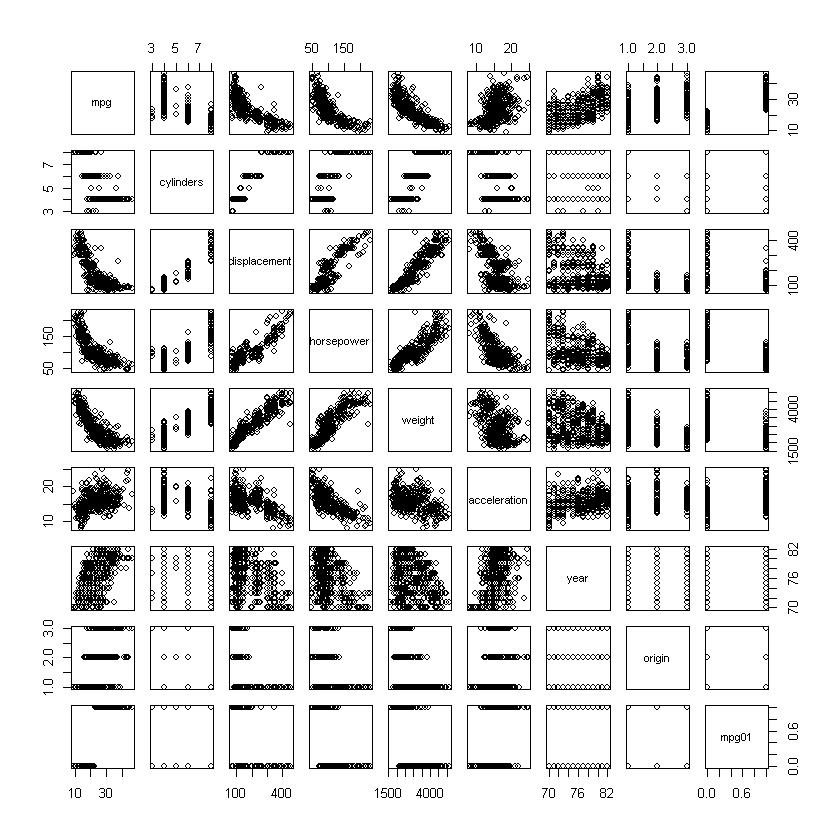

In [101]:
#b)
cor(Auto[,c(1:8,10)])
pairs(Auto[,c(1:8,10)])
#high correlations iwth mpg, cylynders, displacement, horsepower, weight

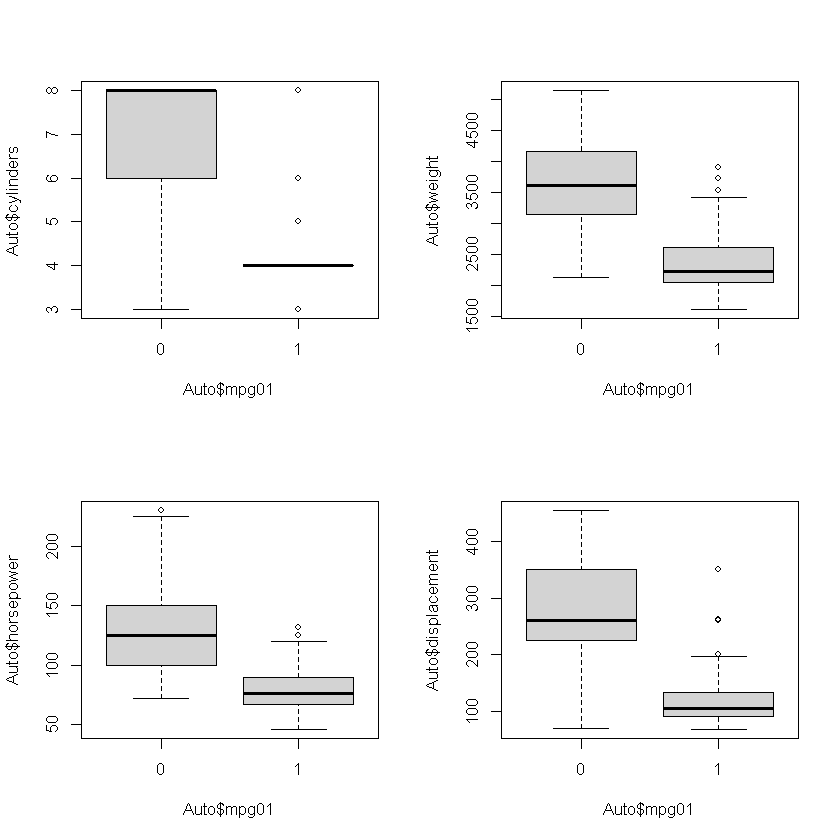

In [115]:
par(mfrow=c(2,2))
boxplot(Auto$cylinders~Auto$mpg01) #more cylinders, less mpg
boxplot(Auto$weight~Auto$mpg01) #more weight, less mpg
boxplot(Auto$horsepower~Auto$mpg01) #more horsepower, less mpg
boxplot(Auto$displacement~Auto$mpg01) #mores displacement, less mpg

In [139]:
#c)
set.seed(100)
train_n<-sample(nrow(Auto),nrow(Auto)*0.7)
test_n<-c(1:nrow(Auto))[!c(1:nrow(Auto))%in%train_n]

train<-Auto[train_n,]
test<-Auto[test_n,]
nrow(train)
nrow(test)


[1] 274

[1] 118

In [143]:
#d)
model_lda<-lda(mpg01~cylinders+weight+horsepower+displacement,data=train)
pred_lda = predict(model_lda, test)
mean(pred_lda$class != test$mpg01)

#we get an error of 10% for test

[1] 0.1016949

In [147]:
#e)
model_qda<-qda(mpg01~cylinders+weight+horsepower+displacement,data=train)
pred_qda = predict(model_qda, test)
mean(pred_qda$class != test$mpg01)

#we get an error of 7.6% for test

[1] 0.07627119

In [149]:
#e)
model_log<-glm(mpg01~cylinders+weight+horsepower+displacement,data=train, family="binomial")

pred1<-predict(model_log,test,type="response")
pred2<-rep(NA,length(pred1))
pred2<-ifelse(pred1>0.5,1,0)

mean(pred2 != test$mpg01)

#we get an error of 11% for test

[1] 0.1101695

In [150]:
#f
set.seed(100)
train_x<-as.matrix(train[,c("cylinders","weight","horsepower","displacement")])
test_x<-as.matrix(test[,c("cylinders","weight","horsepower","displacement")])

knn1_pred <- knn(train=train_x,test=test_x,cl=train$mpg01,k=1)

mean(knn1_pred != test$mpg01)

#we get an error of 15% for test

[1] 0.1525424

In [151]:
knn1_pred <- knn(train=train_x,test=test_x,cl=train$mpg01,k=10)

mean(knn1_pred != test$mpg01)

#we get an error of 12.7% for test

[1] 0.1271186

In [155]:
knn1_pred <- knn(train=train_x,test=test_x,cl=train$mpg01,k=15)

mean(knn1_pred != test$mpg01)

#we get an error of 10% for test

[1] 0.1016949

In [159]:
knn1_pred <- knn(train=train_x,test=test_x,cl=train$mpg01,k=25)

mean(knn1_pred != test$mpg01)

#we get an error of 15% for test

[1] 0.1101695

For the k nearest neighbors, the model with k=15 seems to perform better 